In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/immunity.py
%run ../Scripts/altimmunity.py
%run ../Scripts/initMethods.py
%run ../Scripts/coverage.py

from formulas import running_median_filter

In [2]:
params = { #parameters relevant for the equations
    "Nh":           100000,
    "N0":            30000,
    "M":                1, #Also L, total number of spacers
    "beta":             1,
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    500,
    "dx":                           1,
    "initial_mean_n":         [0,-150],
    "initial_var_n":               100,
    "initial_mean_nh":         [0,200],
    "initial_var_nh":              200,
    "num_threads":                  4,
    "tail_axis":               [1, 1],
    "conv_size":                2000,
    }

In [3]:
nh0 = init_guassian(params["Nh"], sim_params, "nh")

n0 = init_guassian(params["N0"], sim_params, "n")

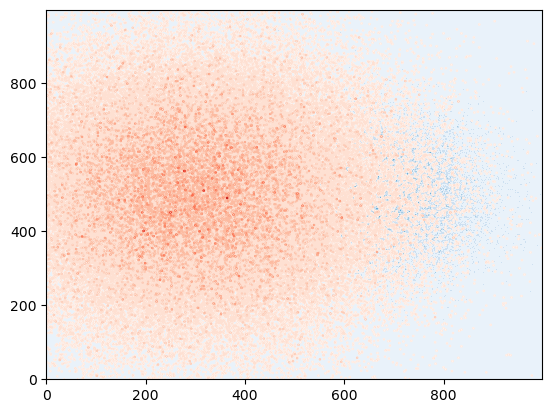

In [4]:
plt.contour(nh0.todense(), cmap="Reds")
plt.contourf(n0.todense(), cmap="Blues")
plt.show()

In [5]:
params["beta"] = 0.00001
guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
nh_new_pos = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)

In [6]:
params["beta"] = -0.00001
guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
nh_new_neg = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)

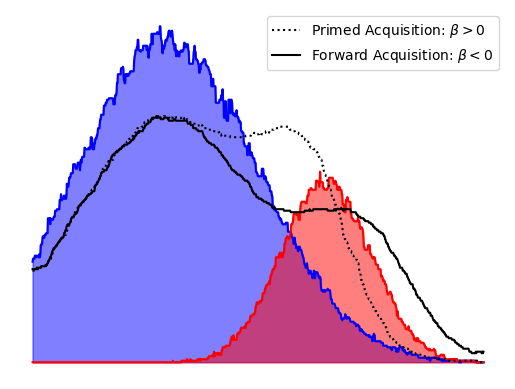

In [8]:
flat_nh_old = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n_old = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
flat_nh_pos = np.array(np.sum(nh_new_pos.todense(), axis = 0)).squeeze()
flat_nh_neg = np.array(np.sum(nh_new_neg.todense(), axis = 0)).squeeze()

flat_nh_pos = running_median_filter(flat_nh_pos,101)
flat_nh_neg = running_median_filter(flat_nh_neg,101)
flat_nh_old = running_median_filter(flat_nh_old,11)
flat_n_old = running_median_filter(flat_n_old,11)

plt.plot(flat_nh_old, color = "blue")
plt.fill_between(np.arange(0, 1000), flat_nh_old, color = "blue", alpha = 0.5)
plt.plot(flat_n_old, color = "red")
plt.fill_between(np.arange(0, 1000), flat_n_old, color = "red", alpha = 0.5)
plt.plot(flat_nh_pos, color = "black", linestyle = ':', label = "Primed Acquisition: " + r"$\beta > 0$")
plt.plot(flat_nh_neg, color = "black", linestyle = '-', label = "Forward Acquisition: " + r"$\beta < 0$")

plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.axis('off')
plt.legend()

In [5]:
Nh = params["Nh"]
N = np.sum(n0)
num_threads = sim_params["num_threads"]

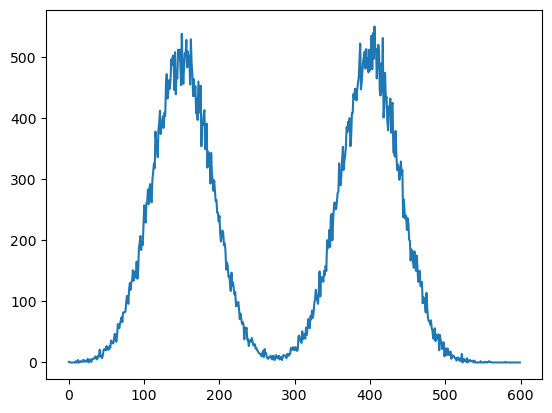

In [6]:
params["beta"] = 0.0000001
guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
plt.plot(flat_nh_new, label = f"beta = {0}")

Text(0.5, 1.0, 'Gaussian Acquisition Kernel')

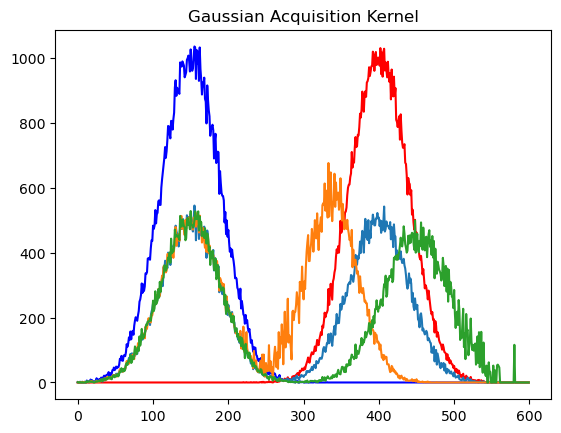

In [7]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.0001, -0.00005]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

# plt.legend()
plt.title("Gaussian Acquisition Kernel")

immunity_gain_from_kernel took 00:00:04
immunity_loss_uniform took 00:00:08
immunity_gain_from_kernel took 00:00:03
immunity_loss_uniform took 00:00:06
immunity_gain_from_kernel took 00:00:03
immunity_loss_uniform took 00:00:06


Text(0.5, 1.0, 'Boltzmann Acquisition Kernel')

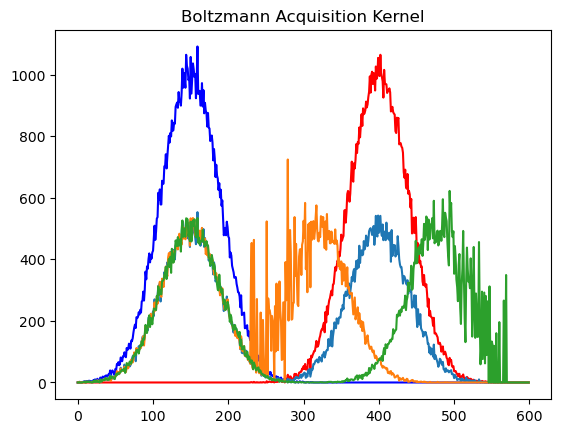

In [19]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.05, -0.05]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=1)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

# plt.legend()
plt.title("Boltzmann Acquisition Kernel")

/Users/zhizhang144515/Documents/CRISPR_Sim/Scripts/initMethods.py:199: RuntimeWarning: overflow encountered in exp
  matrix_ker = np.exp(-exp_radius/kernel)


Text(0.5, 1.0, 'Gaussian Acquisition Kernel')

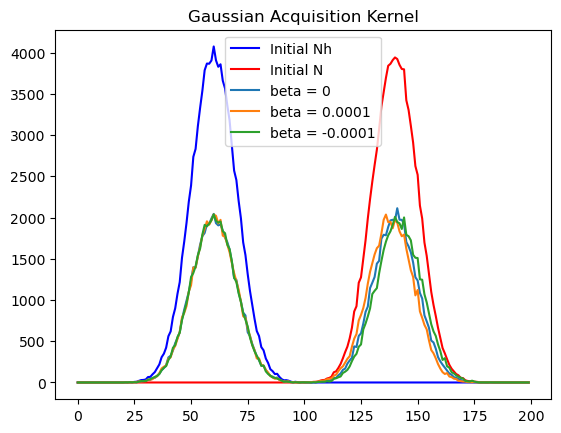

In [176]:
flat_nh = np.array(np.sum(nh0.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n0.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, label = "Initial Nh", color = "blue")
plt.plot(flat_n, label = "Initial N", color = "red")

for b in [0, 0.0001, -0.0001]:
    params["beta"] = b
    guassian_kernel = init_quarter_kernel(params, sim_params, type = "beta", exponent=2)
    nh_intergrated = immunity_gain_from_kernel(nh0, n0, guassian_kernel, params, sim_params)
    nh_new = immunity_loss_uniform(nh_intergrated, n0, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    plt.plot(flat_nh_new, label = f"beta = {b}")

# plt.legend()
plt.title("Gaussian Acquisition Kernel")